In [152]:
# pip install yfinance

In [153]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

In [154]:
download_data = yf.download("VEDL.NS", period="5y")
data = pd.DataFrame(download_data['Close'])
# data

[*********************100%%**********************]  1 of 1 completed


In [155]:
data['mean'] = np.mean(data['Close'])
data['std'] = np.std(data['Close'])

data['rolling_mean'] = data['Close'].rolling(45).mean()
data['2UP'] = data['rolling_mean'] + data['std']
data['2DOWN'] = data['rolling_mean'] - data['std']

data['daily_return'] = data['Close'].pct_change()
data['month_return'] = data['Close'].resample('M').ffill().pct_change()
# resample('M').ffill().pct_change()
# data.head(50)

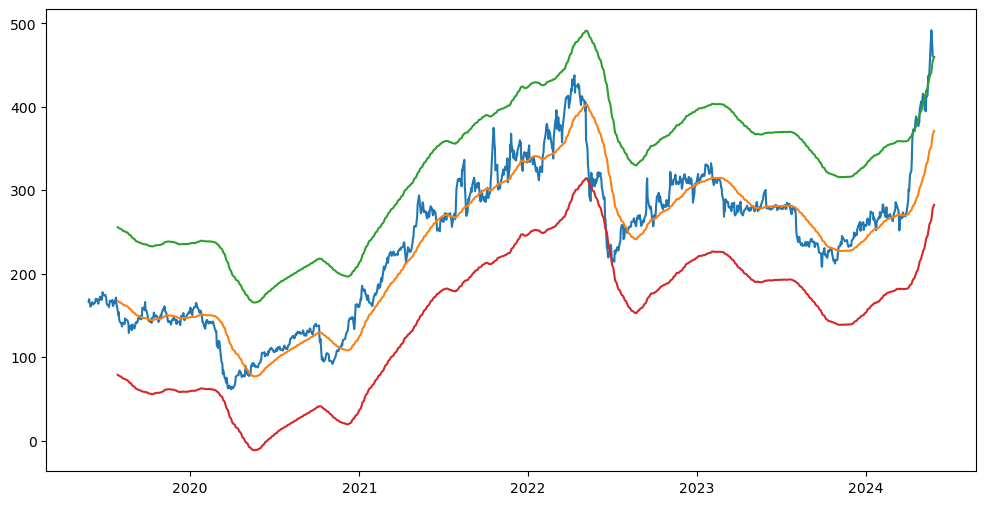

In [156]:
plt.figure(figsize=(12,6))
plt.plot(data['Close'])
plt.plot(data['rolling_mean'])
plt.plot(data['2UP'])
plt.plot(data['2DOWN']);

In [157]:
monthly_data = data['Close'].resample('W', label='left').ffill().pct_change()*100
# monthly_data

In [158]:
np.mean(monthly_data), np.std(monthly_data)

(0.6160830953538512, 6.463148553389956)

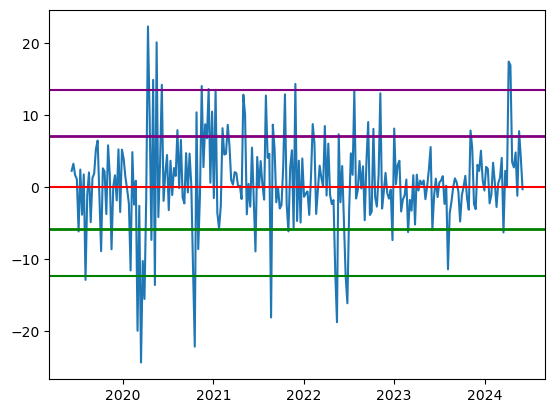

In [159]:
plt.plot(monthly_data)
plt.axhline(0, color = 'red')
plt.axhline(np.mean(monthly_data) + np.std(monthly_data), color='purple', linewidth=2);
plt.axhline(np.mean(monthly_data) - np.std(monthly_data), color='green', linewidth=2);
plt.axhline(np.mean(monthly_data) + 2* np.std(monthly_data), color='purple');
plt.axhline(np.mean(monthly_data) - 2*np.std(monthly_data), color='green');

In [160]:
np.mean(data['daily_return']), np.std(data['daily_return'])


(0.001239537822269525, 0.028669701988912208)

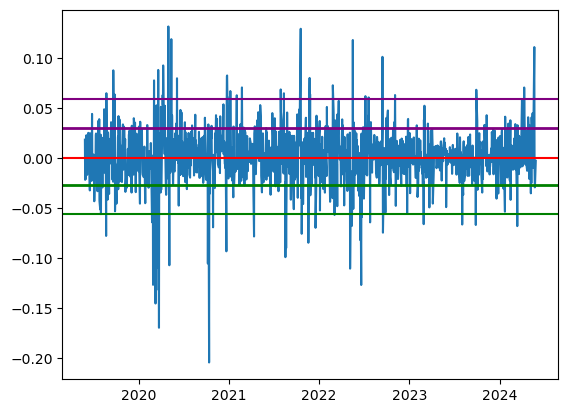

In [162]:
plt.plot(data['daily_return'])
plt.axhline(0, color = 'red')
plt.axhline(np.mean(data['daily_return']) + np.std(data['daily_return']), color='purple', linewidth=2);
plt.axhline(np.mean(data['daily_return']) - np.std(data['daily_return']), color='green', linewidth=2);
plt.axhline(np.mean(data['daily_return']) + 2* np.std(data['daily_return']), color='purple');
plt.axhline(np.mean(data['daily_return']) - 2*np.std(data['daily_return']), color='green');